In [2]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.lss import mass_function
from scipy.integrate import trapezoid as trapz, cumulative_trapezoid as cumtrapz
from scipy.interpolate import interp1d,interp2d
import matplotlib.cm as cm
from scipy import special
from scipy.optimize import curve_fit
import pandas as pd
from tqdm import tqdm
from time import time
import sys
plt.rc('axes', linewidth=1.5)

from colossus.cosmology import cosmology
Cosmo = cosmology.setCosmology("planck18")

from my_functions import *

import warnings
warnings.filterwarnings("ignore")

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [2]:
sys.path.append("SatGen/")
from TreeGen_Sub import *

>>> Initializing SatGen ...


In [3]:
nz=50
z=np.linspace(0.01,5.01,nz)
#nhalo=100000
#mhlog_arr=np.loadtxt("../Method2/mhlog_arr_z8_>11.txt").reshape(nhalo,nz)
#dmhdtlog_arr=np.loadtxt("../Method2/dmhdtlog_arr_z8_>11.txt").reshape(nhalo,nz)
nhalo=9908
mhlog_arr=np.loadtxt("mhlog_arr_z8_>11_reduced.txt").reshape(nhalo,nz)
dmhdtlog_arr=np.loadtxt("dmhdtlog_arr_z8_>11_reduced.txt").reshape(nhalo,nz)

In [4]:
#for ihalo in tqdm(range(nhalo)):
#    red, mass, order=loop(z,mhlog_arr[ihalo,:])

In [7]:
#create merger tree using Satgen
subhaloes=[]
infall_zs=[]
orders=[]
merger_histories=[]
for ihalo in tqdm(range(100)):
    #red, mass, order=loop(z,mhlog_arr[ihalo,:])
    try:
        red, mass, order=loop(z,mhlog_arr[ihalo,:])
        #red, mass, order=loop(z,mhlog_arr[ihalo+9700,:])
    except:
        subhaloes.append(np.zeros(10)-99.)
        infall_zs.append(np.zeros(10))
        orders.append(np.zeros(10)+10)
        merger_histories.append(np.zeros(z.size)-99.)
    mass=np.log10(mass)
    subhaloes.append(np.array([]))
    infall_zs.append(np.array([]))
    orders.append(np.array([]))
    for i in range(mass[:,0].size-1):
        if mass[i+1,np.isfinite(mass[i+1,:])].size>0:
            idx=np.nanargmax(mass[i+1,:])
            subhaloes[ihalo]=np.append(subhaloes[ihalo], mass[i+1,idx])
            infall_zs[ihalo]=np.append(infall_zs[ihalo], red[idx])
            orders[ihalo]=np.append(orders[ihalo], order[i+1,idx])
    merger_histories.append( np.array([ np.log10(np.sum(10**subhaloes[ihalo][np.logical_and(infall_zs[ihalo]>Z,orders[ihalo]<=1)]) ) for Z in z]) )

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [01:30<00:00,  1.10it/s]


In [42]:
np.save("SatGen_merger_trees/SatGen_tree_reduced.npy", [np.array(subhaloes), np.array(infall_zs), np.array(orders)])#, np.array(merger_histories)])


In [3]:
tree=np.load("SatGen_merger_trees/SatGen_tree_reduced.npy", allow_pickle=True)
subhaloes=tree[0].copy()
infall_zs=tree[1].copy()
orders=tree[2].copy()

In [5]:
x=np.array([-99. in tree[0,i] for i in range(tree[0,:].size)])

In [12]:
y=np.array([not X for X in x])

(array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 2., 0.],
        [0., 0., 0., ..., 4., 0., 1.],
        [0., 0., 0., ..., 2., 0., 0.]]),
 array([10.00000085, 10.19894552, 10.39789019, 10.59683487, 10.79577954,
        10.99472421, 11.19366889, 11.39261356, 11.59155824, 11.79050291,
        11.98944758, 12.18839226, 12.38733693, 12.5862816 , 12.78522628,
        12.98417095, 13.18311562, 13.3820603 , 13.58100497, 13.77994964,
        13.97889432]),
 <a list of 9720 BarContainer objects>)

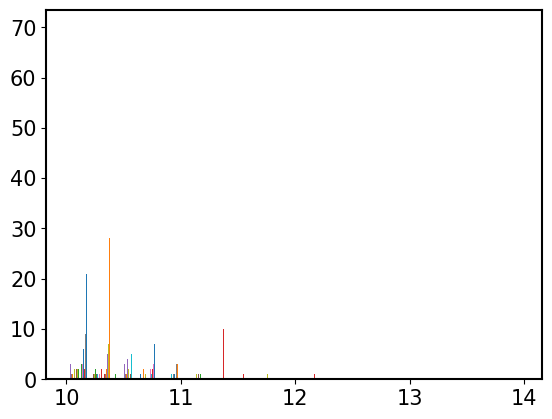

In [16]:
plt.hist(tree[0,y], bins=20)

In [4]:
tree[0,:].size

9908

In [15]:
ihalo=9904
plt.plot(z, mhlog_arr[ihalo,:])
merger_history = np.array([ np.log10(np.sum(10**subhaloes[ihalo][np.logical_and(infall_zs[ihalo]>Z,orders[ihalo]<=1)]) ) for Z in z])
plt.plot(z, merger_history)


NameError: name 'z' is not defined